# Проектная работа
# Приоритезация гипотез по увеличению выручки интернет-магазина и анализ проведенного А/B теста

**Заголовок:** Приоритезация гипотез по увеличению выручки интернет-магазина и анализ проведенного А/B теста


**Описание проекта:** Приоритизировать гипотезы, запустить A/B-тест и проанализироавть результаты. 

[**Ход исследования:**](#p_1)
1. Приоритизация гипотез.
* С помощью фреймворка ICE выполнить приоритизацию гипотез. Сортировка их по убыванию приоритета.
* С помощью фреймворка RICE для приоритизации гипотез. Сортировка их по убыванию приоритета.

2. [Анализ A/B-теста:](#p_2)
* [Загрузка и проверка данных.](#step_2.0)
* [Построение графика кумулятивной выручки по группам.](#step_2.1)
* [Построение графика кумулятивного среднего чека по группам.](#step_2.2)
* [Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.](#step_2.3)
* [Построение графика кумулятивного среднего количества заказов на посетителя по группам.](#step_2.4)
* [Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.](#step_2.5)
* [Построение точечного графика количества заказов по пользователям.](#step_2.6)
* [Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.](#step_2.7)
* [Построение точечного графика стоимостей заказов.](#step_2.8)
* [Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.](#step_2.9)
* [Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.](#step_2.10)
* [Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.](#step_2.11)
* [Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.](#step_2.12) 
* [Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.](#step_2.13)
* [Принятие решение по результатам теста.](#step_2.14)

[**Общий вывод:**](#final)
1. Приоритизация гипотез:

Выяснить, как изменилась приоритизация гипотез при применении RICE вместо ICE. Сделать выводы почему так произошло.

2. Анализ A/B-теста:

Принять решение по результатам теста и объяснение этого решения.


In [1]:
# Импортирование необходимых библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

**Часть 1.** 

**Приоритизация гипотез.**
<a id="p_1"></a>

In [2]:
# Загружаем датафрейм 
hyp_df = pd.read_csv('/datasets/hypothesis.csv', sep=',')
# Приводим наименование полей к нижнему регистру
hyp_df.columns = hyp_df.columns.str.lower()
hyp_df

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
pd.options.display.max_colwidth = 210
# Считаем приоритизацию гипотез с помощью фраймворка ICE
hyp_df['ICE'] = round(hyp_df['impact'] *  hyp_df['confidence'] / hyp_df['efforts'], 1) 
# Сортируем по убыванию приоритета
hyp_df[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [4]:
# Считаем приоритизацию гипотез с помощью фраймворка RICE
hyp_df['RICE'] = hyp_df['reach'] * hyp_df['impact'] *  hyp_df['confidence'] / hyp_df['efforts']
# Сортируем по убыванию приоритета
hyp_df[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Выводы по первой части:**

Приоритизация гипотез меняется в зависимости от применяемого метода расчета (ICE или RICE). Это происходит потому, что в формуле расчета с помощью фреймворка RICE есть множитель *reach* (охват пользователей), в то время как в расчете с помощью фреймворка ICE этого множителя нет. Соответственно, параметр *reach* вносит изменения в приоритизацию гипотез с помощью метода RICE: чем выше охват пользователей, тем выше приоритизация гипотезы.

**Часть 2.** 

**Анализ A/B-теста.**
<a id="p_2"></a>

Выполним загрузку и проверку исходных данных.
<a id="step_2.0"></a>

In [5]:
# Загрузка датасета заказов. Сразу преобразуем поле date к формату datetime64. 
# Выведем на экран датафрейм и информацию о нем.
orders = pd.read_csv('/datasets/orders.csv', sep=',', parse_dates=['date'])
orders['date'] = orders['date'].dt.date
print(orders)
print('\n'*2)
print(orders.info())

      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     1650     B
1        2804400009  3642806036  2019-08-15      730     B
2        2961555356  4069496402  2019-08-15      400     A
3        3797467345  1196621759  2019-08-15     9759     B
4        2282983706  2322279887  2019-08-15     2308     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14     6490     B
1193     2203539145   370388673  2019-08-14     3190     A
1194     1807773912   573423106  2019-08-14    10550     A
1195     1947021204  1614305549  2019-08-14      100     A
1196     3936777065  2108080724  2019-08-15   202740     B

[1197 rows x 5 columns]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-

In [6]:
# Загрузка датасета пользвателей. Сразу преобразуем поле date к формату datetime64. 
# Выведем на экран датафрейм и информацию о нем.
visitors = pd.read_csv('/datasets/visitors.csv', sep=',', parse_dates=['date'])
visitors['date'] = visitors['date'].dt.date
print(visitors)
print('\n'*2)
print(visitors.info())

          date group  visitors
0   2019-08-01     A       719
1   2019-08-02     A       619
2   2019-08-03     A       507
3   2019-08-04     A       717
4   2019-08-05     A       756
..         ...   ...       ...
57  2019-08-27     B       720
58  2019-08-28     B       654
59  2019-08-29     B       531
60  2019-08-30     B       490
61  2019-08-31     B       718

[62 rows x 3 columns]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [7]:
# Проверим дубликаты в исходных датафреймах
print(f'Количество дубликатов в датайфрейме orders: {orders.duplicated().sum()}') 
print(f'Количество дубликатов в датайфрейме visitors: {visitors.duplicated().sum()}') 

Количество дубликатов в датайфрейме orders: 0
Количество дубликатов в датайфрейме visitors: 0


In [8]:
# Проверим количество групп в исходных датафреймах
print(f'Список групп в датайфрейме orders: {list(orders["group"].unique())}')
print(f'Список групп в датайфрейме visitors: {list(visitors["group"].unique())}')

Список групп в датайфрейме orders: ['B', 'A']
Список групп в датайфрейме visitors: ['A', 'B']


In [9]:
# Проверим даты начала и окончания теста в исходных датафреймах
print(f'Дата начала теста в датайфрейме orders: {orders["date"].min()}, '
      f'Дата окончания теста в датайфрейме orders: {orders["date"].max()}')

print(f'Дата начала теста в датайфрейме visitors: {visitors["date"].min()}, '
      f'Дата окончания теста в датайфрейме visitors: {visitors["date"].max()}')
print()

if orders["date"].min() == visitors["date"].min() and orders["date"].max() == visitors["date"].max():
    print('Даты начала и окончания теста в исходных датафреймах совпадают')
else:
    print('Даты начала и окончания теста в исходных датафреймах НЕ совпадают')

Дата начала теста в датайфрейме orders: 2019-08-01, Дата окончания теста в датайфрейме orders: 2019-08-31
Дата начала теста в датайфрейме visitors: 2019-08-01, Дата окончания теста в датайфрейме visitors: 2019-08-31

Даты начала и окончания теста в исходных датафреймах совпадают


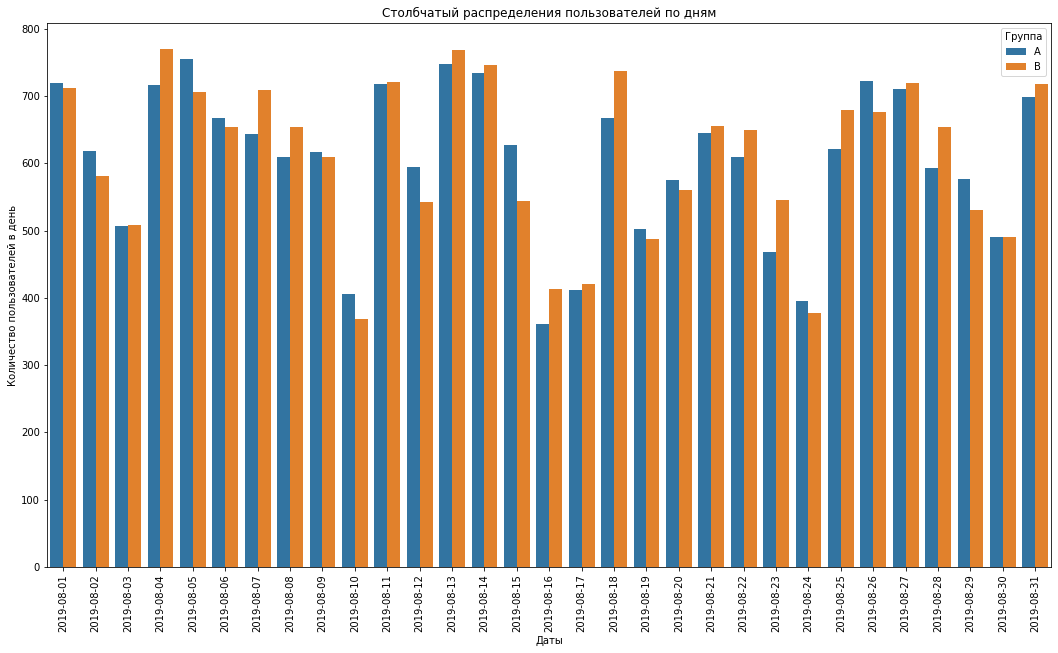

In [10]:
# Проверим распределение пользоватлей по группам в датафрейме visitors

# Устанавливаем размер графика
plt.figure(figsize=(18, 10))
sns.barplot(x='date', y='visitors', hue='group', data=visitors)

# Настройка графика
plt.title('Столбчатый распределения пользователей по дням')
plt.xlabel('Даты')
plt.ylabel('Количество пользователей в день')
plt.legend(title='Группа')
# Поворот значений по оси X
plt.xticks(rotation=90)
# Показать график
plt.show()


На графике видим, что распределение пользователей по дням примерно одинаковое.

In [11]:
# Проверим распределение пользователей по группам в датафрейме orders
grouped_orders = orders.groupby('group').agg(visitor_count=('visitorId', 'count')).reset_index()
grouped_orders

,group,visitor_count
0,A,557
1,B,640


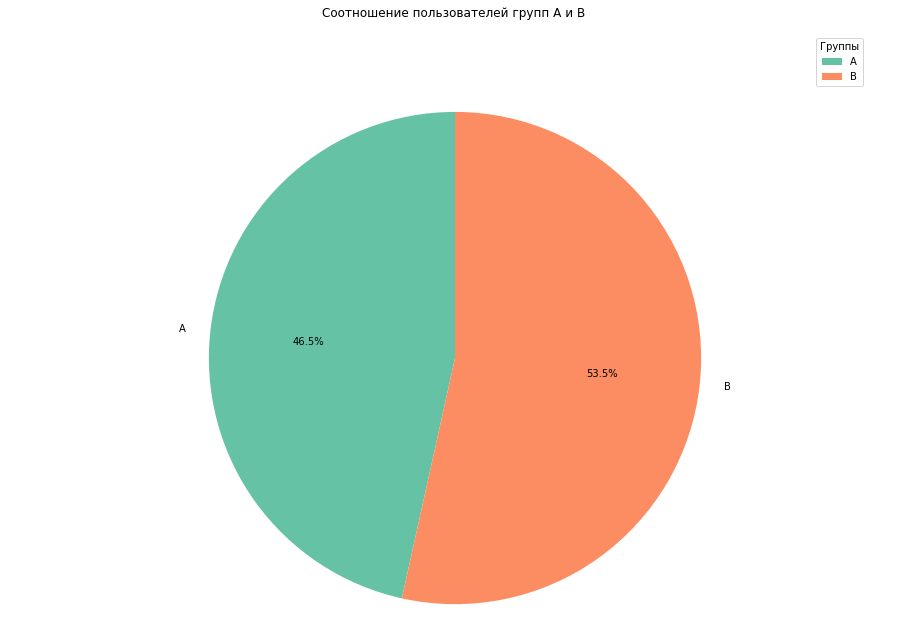

In [12]:
# Создание круговой диаграммы
plt.figure(figsize=(16, 10))
plt.pie(grouped_orders['visitor_count'],
        labels=grouped_orders['group'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Set2")[0:len(grouped_orders)])

# Настройка графика
plt.title('Соотношение пользователей групп А и В', pad=70)
plt.axis('equal')  # Чтобы круг был кругом
# Добавление легенды
plt.legend(grouped_orders['group'], title="Группы", loc='upper left', bbox_to_anchor=(0.9, 1.1))

plt.show()

На графике видим, что пользователей группы В больше на 7 %, что не очень хорошо для проведения А/Б теста.

In [13]:
# Проверим наличие пользвоателей которые попали в обе группы
# Используем для этого пересечение множеств
set1 = set(orders[orders['group'] == 'A']['visitorId'])
set2 = set(orders[orders['group'] == 'B']['visitorId'])

intersection = set1 & set2

print(f'Количество полльзователей которые попали в обе группы: {len(intersection)}') 

Количество полльзователей которые попали в обе группы: 58


Выявили 58 пользователей, которые попали в обе группы, удалим их для чистоты эксперимента.

In [14]:
# Удаление пользователей которые попали в обе группы
orders = orders[~orders['visitorId'].isin(list(intersection))]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


**2.1 Построение графика кумулятивной выручки по группам.**
<a id="step_2.1"></a>

In [15]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date' : 'max', 
     'group' : 'max', 
     'transactionId' : 'nunique', 
     'visitorId' : 'nunique', 
     'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Переименовываем столбцы
ordersAggregated.columns = (['date', 'group', 'cumul_transaction', 'cumul_buyers', 'cumul_revenue',])

ordersAggregated

,date,group,cumul_transaction,cumul_buyers,cumul_revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [16]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                      visitors['group'] == x['group'])].agg({'date' : 'max', 
                                                                             'group' : 'max', 
                                                                             'visitors' : 'sum'}), axis=1).sort_values(
    by=['date','group'])
# Переименовываем столбцы
visitorsAggregated.columns = (['date', 'group', 'cumul_visitors'])

visitorsAggregated

,date,group,cumul_visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [17]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 
                          'group', 
                          'orders', 
                          'buyers', 
                          'revenue', 
                          'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


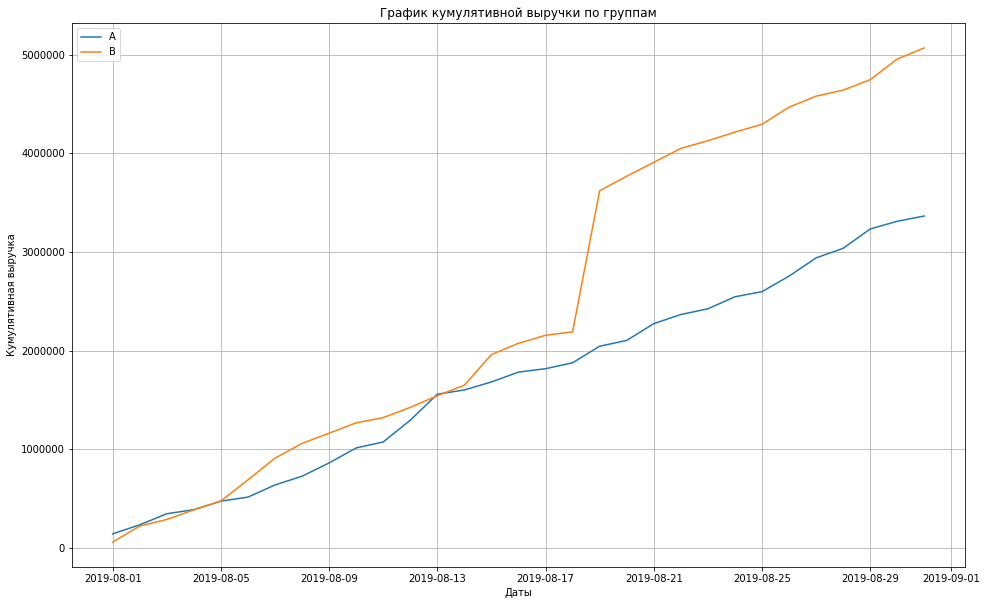

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Устанавливаем размер графика
plt.figure(figsize=(16, 10))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# Добавляем заголовок
plt.title("График кумулятивной выручки по группам")

# Подписи осей
plt.xlabel("Даты")
plt.ylabel("Кумулятивная выручка")

# Добавляем сетку
plt.grid(True)

# Вывод значений по оси y
plt.ticklabel_format(style='plain', axis='y')  

plt.legend();

**Выводы по пункту 2.1:**

Примерно со второго дня эксперимента у сегмента B показатели лучше, чем у сегмента A. Примерно 18 июня сегмент B резко вырывается вперёд. Похоже, что в сегменте B имеются аномально большие заказы.


**2.2 Построение графика кумулятивного среднего чека по группам.**
<a id="step_2.2"></a>

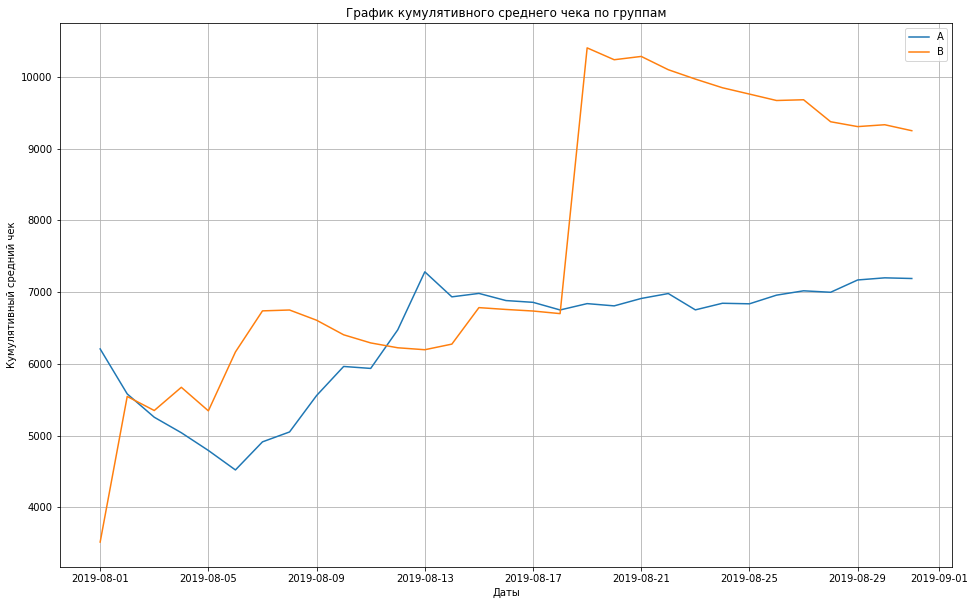

In [19]:
# Устанавливаем размер графика
plt.figure(figsize=(16, 10))

# Строим график кумулятивного среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график кумулятивного среднего чека группы А
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# Добавляем заголовок
plt.title("График кумулятивного среднего чека по группам")

# Подписи осей
plt.xlabel("Даты")
plt.ylabel("Кумулятивный средний чек")

# Добавляем сетку
plt.grid(True)

plt.legend();

**Выводы по пункту 2.2:**

По сегменту B наблюдается стабилизация среднего чека к 18 августа в районе 7000. По сегменту A виден резкий скачок 18 августа. Это означает, что в данных присутствуют аномально большие заказы, и необходимо провести дополнительный анализ на наличие выбросов.

**2.3 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.**
<a id="step_2.3"></a>

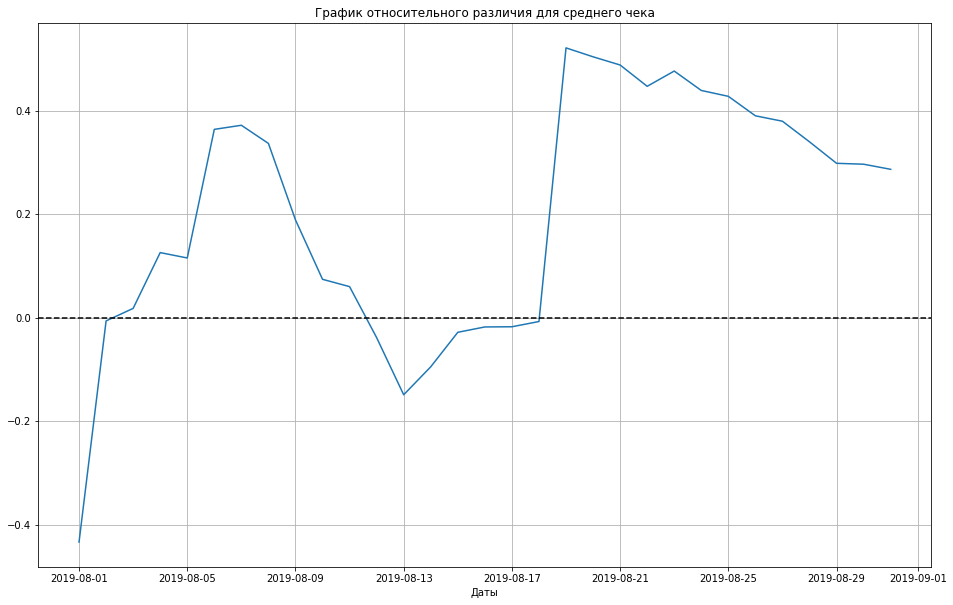

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#mergedCumulativeRevenue

# Устанавливаем размер графика
plt.figure(figsize=(16, 10))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

# Добавляем заголовок
plt.title("График относительного различия для среднего чека")

# Подписи осей
plt.xlabel("Даты")


# Добавляем сетку
plt.grid(True)

**Выводы по пункту 2.3:**

На графике мы наблюдаем резкие взлеты и падения, возможно, вызванные аномальными заказами или выбросами.

**2.4 Построение графика кумулятивного среднего количества заказов на посетителя по группам.**
<a id="step_2.4"></a>

In [21]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


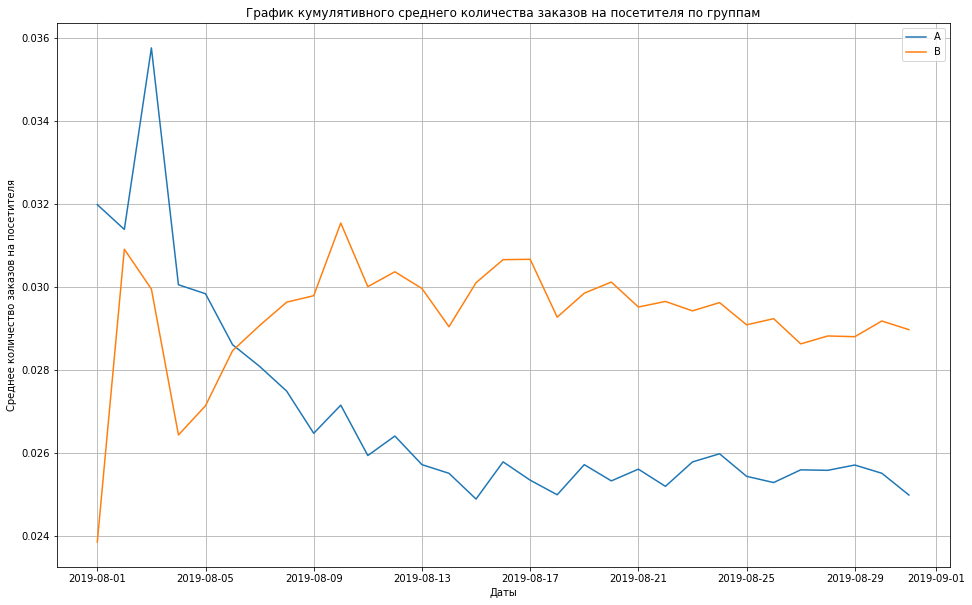

In [22]:
# Устанавливаем размер графика
plt.figure(figsize=(16, 10))

# Добавляем заголовок
plt.title("График кумулятивного среднего количества заказов на посетителя по группам")

# Подписи осей
plt.xlabel("Даты")
plt.ylabel("Среднеe количество заказов на посетителя")

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
# Добавляем сетку
plt.grid(True)

plt.legend();



**Выводы по пункту 2.4:**

На графике мы наблюдаем резкий рост среднего количества заказов на человека в начале у группы А (возможно, это выбросы), далее идет снижение, после 9 августа линия стабилизируется. У группы В вначале наблюдаются резкие скачки, после 17 августа линия также стабилизируется.

**2.5 Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**
<a id="step_2.5"></a>

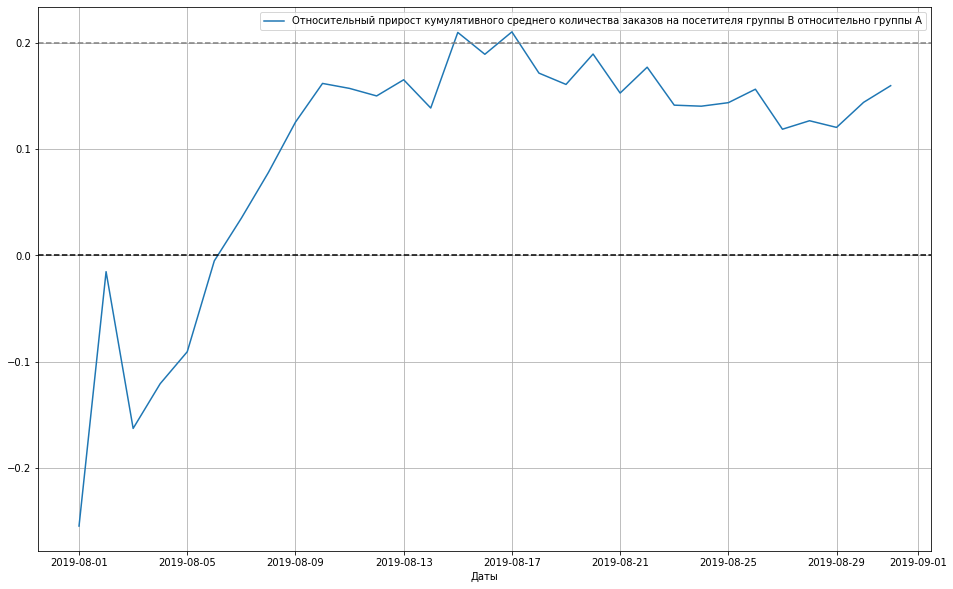

In [23]:
# Объединяем данные
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Устанавливаем размер графика
plt.figure(figsize=(16, 10))

# Считаем относительный прирост заказов на посетителя и строим график
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")

# Подписи осей
plt.xlabel("Даты")


# Добавляем горизонтальные линии для наглядности
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')

# Добавляем сетку
plt.grid(True)

plt.legend();

**Выводы по пункту 2.5:**

В начале графика мы наблюдаем скачки, затем резкий рост заказов в группе В по сравнению с группой А. После 17 августа линия стабилизируется.

**2.6  Построение точечного графика количества заказов по пользователям.**
<a id="step_2.6"></a>

In [24]:
# Посчитаем количество заказов на каждого пользователя
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
# Переименуем столбцы
ordersByUsers.columns = ['userId', 'orders']

ordersByUsers

,userId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


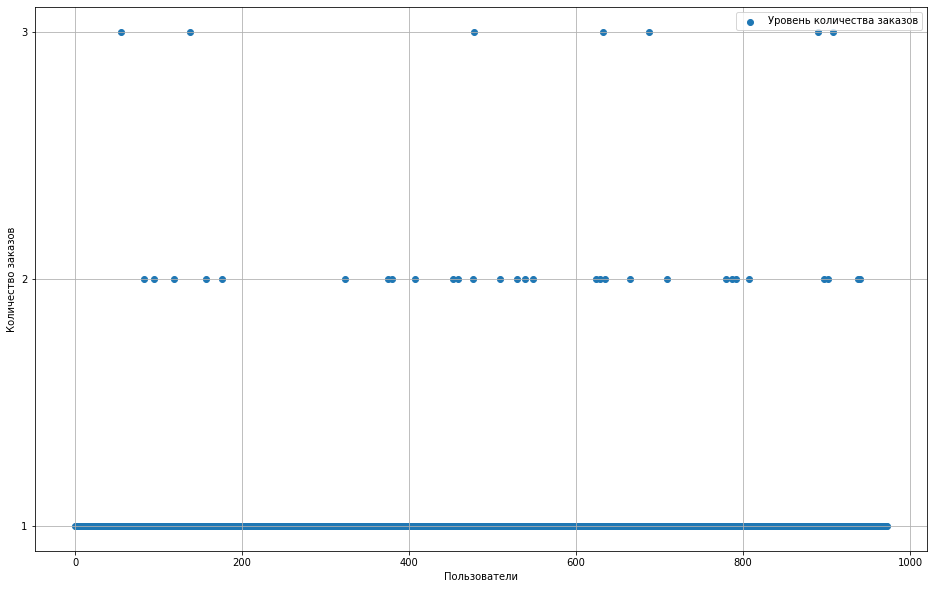

In [25]:
# Для оси Х на графике посчитаем серию из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

# Устанавливаем размер графика
plt.figure(figsize=(16, 10))

# Строим точечный график
plt.scatter(x_values, ordersByUsers['orders'], label="Уровень количества заказов") 

# Устанавливаем отметки по оси Y от 1 до максимального значения в столбце 
plt.yticks(range(1, ordersByUsers['orders'].max() + 1))

# Подписи осей
plt.xlabel("Пользователи")
plt.ylabel("Количество заказов")

# Добавляем сетку
plt.grid(True)

plt.legend();

**Выводы по пункту 2.6:**

Большинство пользователей сделали от 1 до 3х заказов.

**2.7  Расчет 95-й и 99-й перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.**
<a id="step_2.7"></a>

In [26]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


In [27]:
# Выберем верхнюю границу заказов равнуюю 99 процентилю.
max_orders = np.percentile(ordersByUsers['orders'], [90, 95, 99])[-1]
max_orders

2.0

**Выводы по пункту 2.7:**

Не более 1% пользователей оформляли более 2 заказов. Выберем 2 заказа на пользователя в качестве верхней границы числа заказов.

**2.8  Построение точечного графика стоимостей заказов.**
<a id="step_2.8"></a>

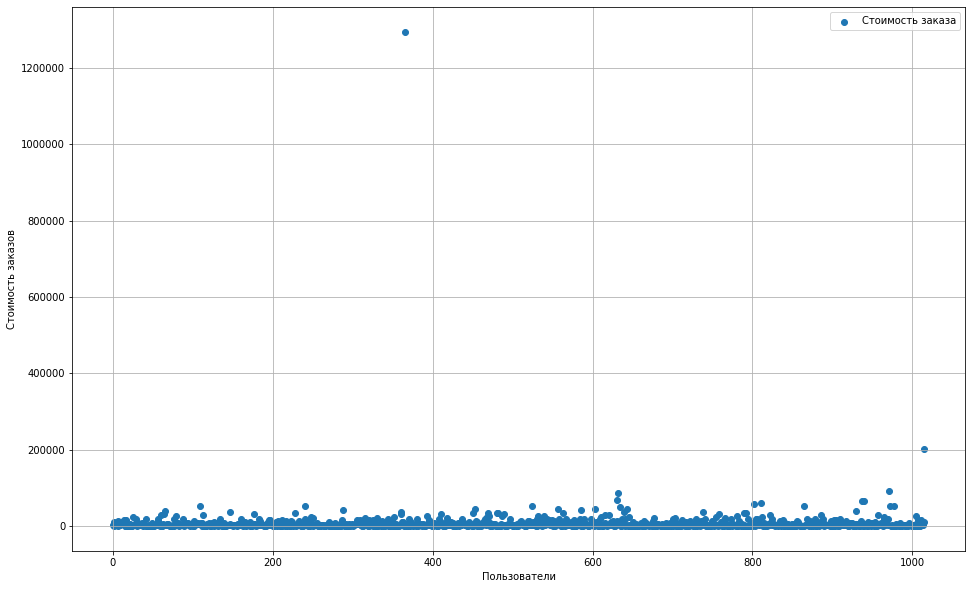

In [28]:
# Для оси Х на графике посчитаем серию из чисел от 0 до количества заказов в orders
x_values = pd.Series(range(0, len(orders['revenue'])))

# Устанавливаем размер графика
plt.figure(figsize=(16, 10))

# Строим точечный график
plt.scatter(x_values, orders['revenue'], label="Стоимость заказа") 

# Подписи осей
plt.xlabel("Пользователи")
plt.ylabel("Стоимость заказов")

# Вывод значений по оси y
plt.ticklabel_format(style='plain', axis='y')  

# Добавляем сетку
plt.grid(True)

plt.legend();


**Выводы по пункту 2.8:**

На графике мы видим аномально большой заказ стоимостью более 1,2 миллиона. Возможно, этот заказ существенно увеличивал средний чек в группе В.

**2.9 Расчет 95-й и 99-й перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.**
<a id="step_2.9"></a>

In [29]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[17990. 26785. 53904.]


In [30]:
# Выберем верхнюю границу стоимости заказов равную 95 процентилю.
max_revenue = np.percentile(orders['revenue'], [90, 95, 99])[-2]
max_revenue

26785.0

**Выводы по пункту 2.9:**

Не более 5% пользователей делали заказ стоимость более 26785, и 10% пользователей делали заказ стоимость более 17990. Выберем стоимость в 26 785 в качестве верхней границы стоимости заказов.

**2.10 Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**
<a id="step_2.10"></a>

**Сформулируем гипотезы:** 

* Нулевая: различий в среднем количестве заказов между группами нет. 
* Альтернативная: различия в среднем между группами есть.

In [31]:
# Расчет кумулятивного количества заказов и кумулятивной суммы заказов на каждую дату для группы A 

# Посчитаем количество пользователей группы А на каждую дату
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]

# Переименуем столбцы
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Посчитаем кумулятивное количество пользлователей группы А на каждую дату
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

# Переименуем столбцы
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

print('Кумулятивное количество пользлователей группы А', '\n'*2, 
      visitorsACummulative.head(), '\n'*2)

# Посчитаем количество заказов и суммарную выручку на каждую дату для группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

# Переименуем столбцы
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Посчитаем кумулятивное количество заказов и кумулятивную сумму заказов на каждую дату для группы A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

# Переименуем столбцы
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA',]

print('Кумулятивное количество заказов и кумулятивная сумма заказов на каждую дату для группы A', '\n'*2,
      ordersACummulative.head(), '\n'*2)


Кумулятивное количество пользлователей группы А 

          date  visitorsCummulativeA
0  2019-08-01                   719
1  2019-08-02                  1338
2  2019-08-03                  1845
3  2019-08-04                  2562
4  2019-08-05                  3318 


Кумулятивное количество заказов и кумулятивная сумма заказов на каждую дату для группы A 

          date  ordersCummulativeA  revenueCummulativeA
0  2019-08-01                  23               142779
1  2019-08-02                  42               234381
2  2019-08-03                  66               346854
3  2019-08-04                  77               388030
4  2019-08-05                  99               474413 




In [32]:
# Расчет кумулятивного количества заказов и кумулятивной суммы заказов на каждую дату для группы В

# Посчитаем количество пользователей группы В на каждую дату
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

# Переименуем столбцы
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Посчитаем кумулятивное количество пользлователей группы В на каждую дату
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)

# Переименуем столбцы
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

print('Кумулятивное количество пользлователей группы В', '\n'*2,
      visitorsBCummulative.head(), '\n'*2)


# Посчитаем количество заказов и суммарную выручку на каждую дату для группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

# Переименуем столбцы
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Посчитаем кумулятивное количество заказов и кумулятивную сумму заказов на каждую дату для группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

# Переименуем столбцы
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB',]

print('Кумулятивное количество заказов и кумулятивная сумма заказов на каждую дату для группы В', '\n'*2,
      ordersBCummulative.head(), '\n'*2)

Кумулятивное количество пользлователей группы В 

           date  visitorsCummulativeB
31  2019-08-01                   713
32  2019-08-02                  1294
33  2019-08-03                  1803
34  2019-08-04                  2573
35  2019-08-05                  3280 


Кумулятивное количество заказов и кумулятивная сумма заказов на каждую дату для группы В 

          date  ordersCummulativeB  revenueCummulativeB
0  2019-08-01                  17                59758
1  2019-08-02                  40               221801
2  2019-08-03                  54               288850
3  2019-08-04                  68               385740
4  2019-08-05                  89               475648 




In [33]:
# Объединяем в одну таблицу все получившиеся датафреймы
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [34]:
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

print('ordersByUsersA', '\n'*2,
      ordersByUsersA.head(), '\n'*2)



ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

print('ordersByUsersB', '\n'*2,
      ordersByUsersB.head(), '\n'*2)

ordersByUsersA 

      userId  orders
0  11685486       1
1  54447517       1
2  66685450       1
3  78758296       1
4  85103373       1 


ordersByUsersB 

      userId  orders
0   5114589       1
1   6958315       1
2  39475350       1
3  47206413       1
4  48147722       1 




In [35]:
# Считаем выборку сколько каждый пользователь сделал заказов, включая тех, кто сделал 0 заказалов для группы А
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


# Считаем выборку сколько каждый пользователь сделал заказов, включая тех, кто сделал 0 заказалов для группы В
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


# Считаем статистическую значимость различий в среднем числе заказов между группами
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]

print(f'p_value = {round(p_value,3)}')
print()

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу. Различия в среднем количестве заказов между группами есть.')
else:
    print('Не удалось отвергнуть нулевую гипотезу. Различия в среднем количестве заказов между группами нет') 
print()

# Считаем относительные различия в среднем числе заказов между группами
diff = sampleB.mean() / sampleA.mean() - 1
print(f'Разница средних значений количесва заказов между группами В и А = {round(diff*100,1)}%')

p_value = 0.011

Отвергаем нулевую гипотезу. Различия в среднем количестве заказов между группами есть.

Разница средних значений количесва заказов между группами В и А = 16.0%


**Выводы по пункту 2.10:**

Расчет статистической значимости различий *по «сырым» данным* в среднем количестве заказов на посетителя между группами **показал наличие различий** в среднем количестве заказов между группами.

**2.11 Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.**
<a id="step_2.11"></a>

**Сформулируем гипотезы:** 

* Нулевая гипотеза: различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [36]:
# Считаем статистическую значимость различий в среднем чеке заказов между группами А и В
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print(f'p_value = {round(p_value,3)}')
print()

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу. Различия в среднем чеке между группами есть.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.  Различий в среднем чеке между группами нет.') 
print()


# Считаем относительные различия в среднем чеке между группами В и А
diff = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
print(f'Разница значений средних чеков между группами В и А = {round(diff*100,1)}%')

p_value = 0.829

Не удалось отвергнуть нулевую гипотезу.  Различий в среднем чеке между группами нет.

Разница значений средних чеков между группами В и А = 28.7%


**Выводы по пункту 2.11:**

По «сырым» данным различий в среднем числе заказов между группами A и B **нет**. Однако мы наблюдаем значительную разницу в средних чеках между группами A и B, составляющую **28,7%**. Необходимо провести расчет статистической значимости различий в среднем чеке заказа между группами на основе «очищенных» данных. 

**2.12 Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**
<a id="step_2.12"></a>

In [37]:
# Сделаем срез пользователей с аномально большим числом заказов.
# Верхнюю границу кольчества зазазов мы приняли равное 3 в п. 2.7

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > max_orders]['userId'],
    ],
    axis=0,
)

# Сделаем срез пользователей с аномально дорогими заказами.
# Верхнюю границу стоимости зазаза мы приняли в размере 20 000 в п. 2.9
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorId']

# Объединим аномальных пользователей в одной таблице.
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(f'Количество аномальных пользователей: {len(abnormalUsers)}') 
print()

# Посчитаем процент аномальных пользователей от общего числа пользователей
per_abnormalUsers = len(abnormalUsers) / len(orders["visitorId"].unique())


if per_abnormalUsers < 0.1: 
    print(f'Процент аномальных пользователей {round(per_abnormalUsers*100,1)}%. Это менее 10%, можно исключать из датафрейма')                                         
else:
    print(f'Процент аномальных пользователей {round(per_abnormalUsers*100,1)}%. Это более 10%, нельзя исключать из датафрейма')

Количество аномальных пользователей: 58

Процент аномальных пользователей 6.0%. Это менее 10%, можно исключать из датафрейма


In [38]:
# Подготовим выборку количества заказов по пользователям группам А за исключением аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


# Подготовим выборку количества заказов по пользователям группам В за исключением аномальных пользователей
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



In [39]:
# Считаем статистическую значимость различий в среднем числе заказов между группами
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print(f'p_value = {round(p_value,3)}')
print()

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу. Различия в среднем количестве заказов между группами есть.')
else:
    print('Не удалось отвергнуть нулевую гипотезу. Различия в среднем количестве заказов между группами нет') 
print()

# Считаем относительные различия в среднем числе заказов между группами
diff = sampleBFiltered.mean() / sampleAFiltered.mean() - 1
print(f'Разница средних значений количесва заказов между группами В и А = {round(diff*100,1)}%')

p_value = 0.012

Отвергаем нулевую гипотезу. Различия в среднем количестве заказов между группами есть.

Разница средних значений количесва заказов между группами В и А = 18.2%


**Выводы по пункту 2.12:**

Результаты по среднему количеству заказов практически не изменились.

**2.13 Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.**
<a id="step_2.13"></a>

In [40]:
p_value = stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(
        orders['visitorId'].isin(abnormalUsers)),)]['revenue'], orders[np.logical_and(
        orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]

print(f'p_value = {round(p_value,3)}')
print()

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу. Различия в среднем чеке между группами есть.')
else:
    print('Не удалось отвергнуть нулевую гипотезу.  Различий в среднем чеке между группами нет.') 
print()

# Считаем относительные различия в среднем чеке между группами В и А
diff = orders[np.logical_and(
    orders['group'] == 'B', np.logical_not(
        orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not(
    orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1
print(f'Разница значений средних чеков между группами В и А = {round(diff*100,1)}%')

p_value = 0.646

Не удалось отвергнуть нулевую гипотезу.  Различий в среднем чеке между группами нет.

Разница значений средних чеков между группами В и А = -4.8%


**Выводы по пункту 2.13:**

P-value увеличился, но и разница между сегментами сократилась с 28.7% до -4.8%. Различий в среднем чеке между группами нет.

**2.14 Принятие решения по результатам теста.**
<a id="step_2.14"></a>

Имеющиеся факты:
* Есть статистически значимые различия по среднему количеству заказов между группами по «сырым», и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A примерно на 10-15%. 

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Количество заказов в группе В увеличилось по сравнению с группой А. Статистическая разница по среднему чеку в группах А и В не обнаружена. 

**Общий вывод:**
<a id="final"></a>
1. Выводы по первой части
Приоритизация гипотез меняется в зависимости от применяемого метода расчета (ICE или RICE). Это происходит потому, что в формуле расчета с помощью фреймворка RICE есть множитель *reach* (охват пользователей), в то время как в расчете с помощью фреймворка ICE этого множителя нет. Соответственно, параметр *reach* вносит изменения в приоритизацию гипотез с помощью метода RICE: чем выше охват пользователей, тем выше приоритизация гипотезы.    
2. Выводы по второй части. Тест следует остановить и признать его успешным. Количество заказов в группе В увеличилось по сравнению с группой А. Статистическая разница по среднему чеку в группах А и В не обнаружена. 
    